In [1]:
# Linear Regression

In [6]:
# Let's fabricate some data that shows a roughly linear relationship between page speed and amount purchased:

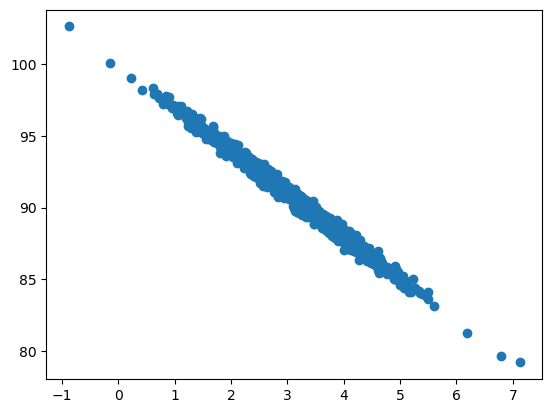

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = 100 -  (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3
scatter(pageSpeeds, purchaseAmount)
plt.show()

In [4]:
# As we only have two features, we can keep it simple and just use scipy.state.linregress:

In [5]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)


In [6]:
# Not surprisngly, our R-squared value shows a really good fit:

In [7]:
r_value ** 2

np.float64(0.9897657598665137)

In [8]:
# Let's use the slope and intercept we got from the regression to plot predicted values vs. observed:

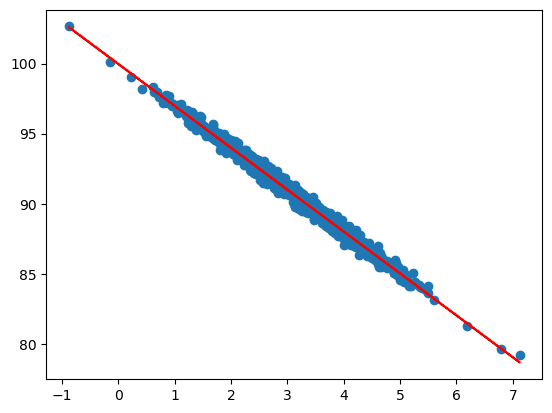

In [9]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(pageSpeeds)
plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()

In [10]:
# Polynomial Regression

In [11]:
# What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

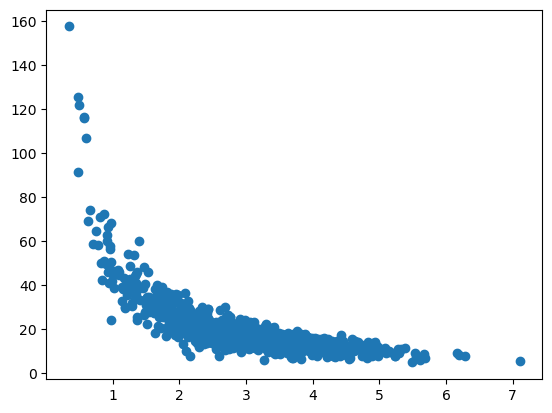

In [12]:
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)
plt.show()

In [13]:
#numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [14]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))

In [15]:
#We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

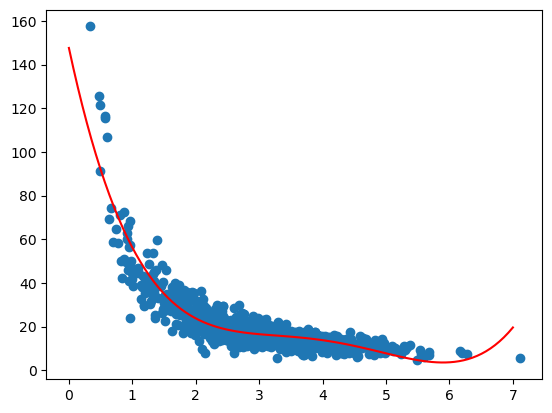

In [16]:
xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c = 'r')
plt.show()

In [17]:
#Looks pretty good! Let's measure the r-squared error:

In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))
print(r2)

0.8293766396303073


In [19]:
# Multiple Regression

In [20]:
#Let's grab a small little data set of Blue Book car values:

In [21]:
import pandas as pd

df = pd.read_excel("cars.xls", engine="xlrd")

print(df.head())


          Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129     8221  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083     9135  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862    13196  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140    16342  Buick  Century  Sedan 4D  Sedan         6    3.1   
4  16339.170324    19832  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors  Cruise  Sound  Leather  
0      4       1      1        1  
1      4       1      1        0  
2      4       1      1        0  
3      4       1      0        0  
4      4       1      0        1  


                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


/var/folders/96/xq9kmpsj5298zg6j77cqz8xm0000gn/T/ipykernel_18297/4284725275.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean()


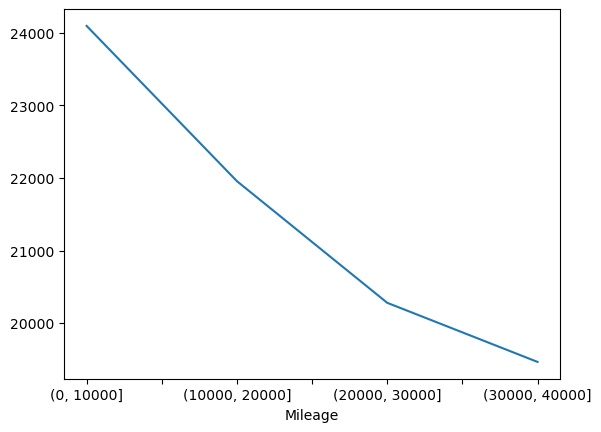

In [22]:
df1 = df[['Mileage', 'Price']]
bins = np.arange(0, 50000, 10000)
groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean()
print(groups.head())
groups['Price'].plot.line()
plt.show()

In [23]:
#We can use pandas to split up this matrix into the feature vectors we're interested in, and the value we're trying to predict.

#Note how we are avoiding the make and model; regressions don't work well with ordinal values, unless you can convert them into some numerical order that makes sense somehow.

#Let's scale our feature data into the same range so we can easily compare the coefficients we end up with.

In [28]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)
X = sm.add_constant(X)

print(X)

est = sm.OLS(y, X).fit()
print(est.summary())


     const   Mileage  Cylinder     Doors
0      1.0 -1.417485   0.52741  0.556279
1      1.0 -1.305902   0.52741  0.556279
2      1.0 -0.810128   0.52741  0.556279
3      1.0 -0.426058   0.52741  0.556279
4      1.0  0.000008   0.52741  0.556279
..     ...       ...       ...       ...
799    1.0 -0.439853   0.52741  0.556279
800    1.0 -0.089966   0.52741  0.556279
801    1.0  0.079605   0.52741  0.556279
802    1.0  0.750446   0.52741  0.556279
803    1.0  1.932565   0.52741  0.556279

[804 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     150.0
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           3.95e-77
Time:                        13:23:14   Log-Likelihood:                -8356.7
No. Observ

/var/folders/96/xq9kmpsj5298zg6j77cqz8xm0000gn/T/ipykernel_18297/3632583278.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)


In [29]:
#The table of coefficients above gives us the values to plug into an equation of form:
#    B0 + B1 * Mileage + B2 * cylinders + B3 * doors
    
#In this example, it's pretty clear that the number of cylinders is more important than anything based on the coefficients.

#Could we have figured that out earlier?

In [30]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

In [31]:
#Surprisingly, more doors does not mean a higher price! (Maybe it implies a sport car in some cases?) So it's not surprising that it's pretty useless as a predictor here. This is a very small data set however, so we can't really read much meaning into it.

#How would you use this to make an actual prediction? Start by scaling your multiple feature variables into the same scale used to train the model, then just call est.predict() on the scaled features:

In [32]:
scaled = scale.transform([[45000, 8, 4]])
scaled = np.insert(scaled[0], 0, 1)
print(scaled)
predicted = est.predict(scaled)
print(predicted)

[1.         3.07256589 1.96971667 0.55627894]
[27658.15707316]
